# Introducción a Matpotlib

Esto pretende ser un tutorial del módulo pyplot de la librería matplotlib. En este tutorial nos centraremos en presentar diferentes tipos de gáfico que puden crearse usando el modulo pyplot de la libreria matplotlib.


## Index
1. **[Primeros pasos con plt.plot](#1.-Primeros-pasos-con-plt.plot)**

2. **[Configuración del gráfico](#2.-Configuración-del-gráfico)**
   * [2.1 Modificando el aspecto de los ejes](#2.1-Modificando-el-aspecto-de-los-ejes)
   * [2.2 Resaltando partes del gráfico](#2.2-Resaltando-partes-del-gráfico)
   * [2.3 Configurando el texto del gráfico](#2.3-Configurando-el-texto-del-gráfico)

3. **[Representando series de datos](#3.-Representando-series-de-datos)**
   * [3.1 plt.plot en profundidad](#3.1-plt.plot-en-profundidad)
   * [3.2 Lineas verticales con plt.stem](#3.2-Lineas-verticales-con-plt.stem)
   * [3.3 Rellenando areas entre puntos y curvas](#3.3-Rellenando-areas-entre-puntos-y-curvas)
   * [3.4 Diagramas de caja](#3.4-Diagramas-de-caja)

4. **[Gráficos de barras](#4.-Gráficos-de-barras)**
   * [4.1 Diagrama de barras](#4.1-Diagrama-de-barras)
   * [4.2 Histogramas](#4.2-Histogramas)
   * [4.3 Gráficos de escaleras](#4.3-Gráficos-de-escaleras)

5. **[Gráficos 2D](#5.-Gráficos-2D)**
   * [5.1 Scatter Plots](#5.1-Scatter-Plots)
   * [5.2 Gráficos de contorno](#5.2-Gráficos-de-contorno)
   * [5.3 Hexbin](#5.3-Hexbin)

## [1.](#Index) Primeros pasos con plt.plot

Para los ejercicios de ejemplo utilizaremos el Iris Dataset que presentamos en el apartado de Pandas. Asi que empezaremos por cargar los datos y simplificar un poco el nombre de las diferentes columnas.

In [1]:
import pandas as pd
df = pd.read_csv('../../data/04_01_iris.csv')
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np

Absolutamente todo lo que vamos a usar en este tutorial y que está relacionado con `matplotlib.pyplot` lo podréis encontrar documentado y detallado [aquí](http://matplotlib.sourceforge.net/api/pyplot_api.html#module-matplotlib.pyplot).

Para que quede claro desde un principio, las dos zonas principales donde se dibujaran cosas o sobre las que se interactuará serán:

* `figure`, que es una instancia de [`matplotlib.figure.Figure`](http://matplotlib.sourceforge.net/api/figure_api.html#matplotlib.figure.Figure). Y es la ventana donde irá el o los gráficos en sí:

![](../../images/05_01_figure.png)

* `axes`, que es una instancia de [`matplotlib.axes.Axes`](http://matplotlib.sourceforge.net/api/axes_api.html#matplotlib.axes.Axes), que es el gráfico en sí donde se dibujará todo lo que le digamos y está localizada dentro de una figure.

![](../../images/05_02_axes.png)

Para lo primero (`figure`) usaremos la palabra ‘ventana’ mientras que para lo segundo (`axes`) usaremos la palabra ‘gráfico’.

Empezaremos este tutorial hablando de `pyplot.plot()`, una funcion que nos permite representar series de datos unidimensionales.

In [4]:
plt.plot?

In [5]:
y = df["sepal_length"].values
x = df.index.values

Por ejemplo, podemos representar los valos de la lonitud de pétalo de cada especimen de iris, llamando a la función de la siguiente forma.

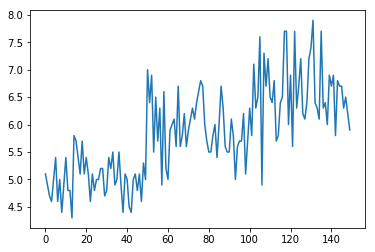

In [6]:
plt.plot(x, y)

`plt.plot()` Ofrece la posibilidad de customizar todos los atributos visuales del gráfico. Por ejemplo, si queremos cambiar el color de la linea dibujada o su grosor, es posible hacerlo modificando los parámetros `color` y `linewitdh` respectivamente.

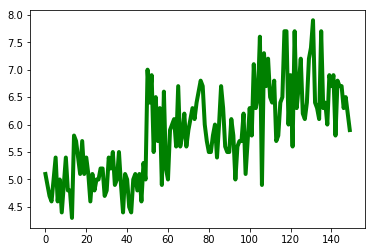

In [7]:
plt.plot(x, y, color="green", linewidth=4)

Otro de los aspectos que `plt.plot` permite configurar, es como se representan cada uno de los valores y las lineas que los unen. El parámetro `marker`[(ver referencia)](https://matplotlib.org/examples/lines_bars_and_markers/marker_reference.html) controla como se representan cada uno de los puntos, mientras que `linestyle`[(ver referencia)](https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html) permite configurar como se muestras las uniones entre ellos.

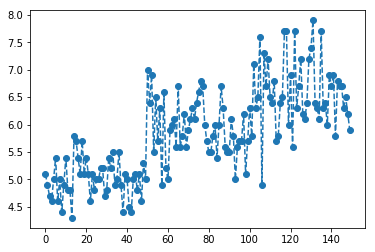

In [8]:
plt.plot(x, y, marker="o", linestyle="--")

## [2.](#Index) Configuración del gráfico

En esta sección explicaremos como modificar algunos aspectos visuales del gráfico. Si lo que queremos es modificar el tamaño de la ventana, vamos a modificar el parámetro `figsize` al crear una nueva ventana con `plt.figure`.

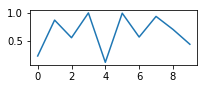

In [9]:
width = 3
height = 1
plt.figure(figsize=(width, height))
plt.plot(np.random.random(10))

### [2.1](#Index) Modificando el aspecto de los ejes


El área del gráfico puede ser un área rectangular o un área para [un gráfico polar (ver ejemplo)](https://www.pybonacci.org//2012/03/24/dibujando-una-rosa-de-frecuencias/).

Podemos colocar una rejilla que nos ayude a identificar mejor las áreas del gráfico mediante `plt.grid()` (en un gráfico polar deberemos usar `plt.rgrid()` y `plt.thetagrids()`).

Si os habéis fijado, `matplotlib` dibuja los ejes de forma que se ajusten al gráfico pero quizá eso no es lo que nos interese en algunos momentos, para ello podemos hacer uso de `plt.axis()`. Nos permite definir la longitud de los ejes, si queremos que aparezcan los mismos, si queremos que estos estén escalados,… Si solo nos interesa configurar uno de los ejes y dejar que el otro lo maneje `matplotlib` podemos usar `plt.xlim()`, `plt.xscale()`, `plt.ylim()` y `plt.yscale()`. Si queremos dejar el eje x o el eje y con escala logarítmica podemos usar, respectivamente, `plt.semilogx()` o `plt.semilogy()`. Podemos dibujar un segundo eje x o un segundo eje y usando `plt.twinx()` o `plt.twiny()`, respectivamente. También podemos establecer unos márgenes alrededor de los límites de los ejes usando `plt.margins()`. Por último, podemos etiquetar nuestros ejes con `plt.xlabel()` y `plt.ylabel()`. Veamos un ejemplo de algunas de estas cosas:

(-10, 110)

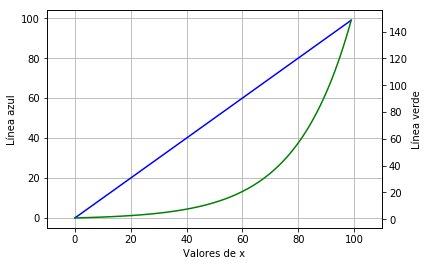

In [10]:
plt.plot(np.arange(100), 'b')  # Dibujamos una línea recta azul
plt.grid() #Activamos la rejilla
plt.xlabel('Valores de x')  # Ponemos etiqueta al eje x
plt.ylabel(u'Línea azul')  # Ponemos etiqueta al eje y
plt.twinx()  # Creamos un segundo eje y
plt.plot(np.exp(np.linspace(0,5,100)), 'g')  # Dibuja una exponencial de 0 a 5 con la y representada en el segundo eje y
plt.ylabel(u'Línea verde')  # Ponemos etiqueta al segundo eje y
plt.xlim(-10,110)  # Limitamos los valores del eje x para que vayan desde -10 a 110


### [2.2](#Index) Resaltando partes del gráfico

Ahora vamos a ver `plt.axvline()`, `plt.axvspan()`, `plt.axhline()`, `plt.axhspan()`. ¿Y para qué sirven estas 'cosas'? Pensad que, por ejemplo, queréis resaltar una zona de vuestro gráfico para focalizar la atención en esa área. Eso lo podríamos hacer usando lo anterior. `plt.axvline()` y `plt.axhline()` dibujan líneas verticales y horizontales en la x o en la y que le digamos mientras que `plt.axvspan` y `plt.axhspan` dibujan recuadros entre las coordenadas x o y que queramos, respectivamente.

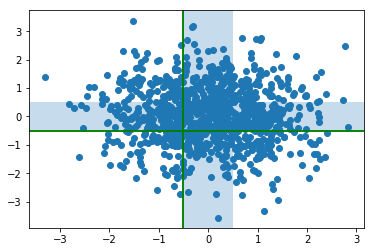

In [11]:
plt.scatter(np.random.randn(1000), np.random.randn(1000))  # Dibujamos un scatterplot de valores aleatorios
plt.axvline(-0.5, color='g')  # Dibujamos una línea vertical verde centrada en x = -0.5
plt.axvline(-0.5, color='g')  # Dibujamos una línea vertical verde centrada en x = 0.5
plt.axhline(-0.5, color='g')  # Dibujamos una línea horizontal verde centrada en x = -0.5
plt.axhline(-0.5, color='g')  # Dibujamos una línea horizontal verde centrada en x = 0.5
plt.axvspan(-0.5,0.5, alpha=0.25)  #  Dibujamos un recuadro azul vertical entre x[-0.5,0.5] con transparencia 0.25
plt.axhspan(-0.5,0.5, alpha=0.25)  #  Dibujamos un recuadro azul horizontal entre x[-0.5,0.5] con transparencia 0.25

### [2.3](#Index) Configurando el texto del gráfico

¿Y como podemos controlar el texto básico sobre el gráfico? Hay muchas formas de meter texto y controlar las etiquetas de forma básica y sencilla. En algunos momentos hemos visto `plt.legend()`, también existe `plt.figlegend()`. Yo siempre uso `plt.legend()` el 100% de las veces. Para usos avanzados podéis mirar [este enlace](http://stackoverflow.com/a/4701285) y este [otro enlace](http://matplotlib.sourceforge.net/users/legend_guide.html). 

Si queremos poner un título al gráfico podemos usar `plt.title()` y `plt.suptitle()`. Si queremos poner título a los ejes podemos usar `plt.xlabel()` y `plt.ylabel()` para los ejes x e y, respectivamente. Por último, para controlar los valores de las etiquetas que se ponen sobre los ejes dispones de `plt.locator_params()`, `plt.minorticks_on()`, `plt.minorticks_off()`, `plt.tick_params()`, `plt.tick_label_format()`, `plt.xticks()` y `plt.yticks()`. Vamos a manejar la mayor parte de estas funciones mediante un ejemplo para que se vea más claro su uso. Imaginemos que queremos representar el valor medio diario de una variable durante un año, en el eje x queremos que aparezca solo los meses en el día del año en que empieza el mes.

Text(0,0.5,'Media diaria')

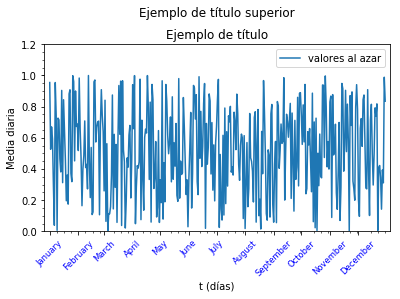

In [12]:
import calendar
dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(12)+1]  # Para generar el lugar del primer días de cada mes en un año
meses = calendar.month_name[1:13]  # Creamos una lista con los nombres de los meses
plt.axes([0.1,0.2,0.8,0.65])
plt.plot(np.arange(1,366), np.random.rand(365), label = 'valores al azar')  # Creamos un plot con 365 valores
plt.xlim(-5,370)  # Los valores del eje y variarán entre -5 y 370
plt.ylim(0,1.2)  # Los valores del eje y variarán entre 0 y 1.2
plt.legend()  # Creamos la caja con la leyenda
plt.title(u'Ejemplo de título')  # Ponemos un título
plt.suptitle(u'Ejemplo de título superior')  # Ponemos un título superior
plt.minorticks_on()  # Pedimos que se vean subrayas de división en los ejes
plt.xticks(dias, meses, size = 'small', color = 'b', rotation = 45)  # Colocamos las etiquetas, meses, en las posiciones, dias, con color azul y rotadas 45º
plt.xlabel(u't (días)')
plt.ylabel('Media diaria')

## [3.](#Index) Representando series de datos

Hasta ahora hemos visto como configurar las ventanas, manejo de las mismas, definir áreas de gráfico,… Ahora vamos a ir viendo los diferentes tipos de gráficos que existen.

### [3.1](#Index) plt.plot en profundidad

Como habéis podido comprobar, en los ejemplos anteriores hemos estado viendo mucho `plt.plot()` que es lo que se suele usar para dibujar un gráfico simple de líneas representando los valores (x, f(x)). Ahora vamos a ver un ejemplo explicado para que veáis todas las posibilidades de `plt.plot()`.

Text(0,0.5,'valores f(x)')

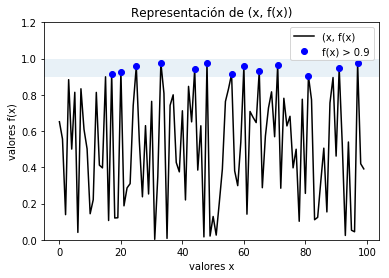

In [13]:
x = np.arange(100)  # Valores de x
y = np.random.rand(100)  # Valores de y
plt.plot(x,y, color = 'black', label = '(x, f(x)')  # Dibujamos la evolución de f(x), frente a x
plt.plot(x[y > 0.9], y[y > 0.9], 'bo', label = 'f(x) > 0.9')  # Destacamos los valores por encima de 0.9 colocándoles un marcador circular azul
plt.axhspan(0.9, 1, alpha = 0.1)  # Colocamos una banda de color para los valores f(x) > 0.9
plt.ylim(0,1.2)  # Limitamos el eje x
plt.legend()  # Colocamos la leyenda
plt.title(u'Representación de (x, f(x))')  # Colocamos el título del gráfico
plt.xlabel('valores x')  # Colocamos la etiqueta en el eje x
plt.ylabel('valores f(x)')  # Colocamos la etiqueta en el eje y

Este es el tipo de gráfico que suelo usar un 75% de las veces. Tipos de gráfico análogos a este son `plt.plot_date()`, que es similar a `plt.plot()` considerando uno o ambos ejes como fechas, y `plt.plotfile()`, que dibuja directamente desde los datos de un fichero.

### Ejercicio: Dibuja las longitudes de los sépalos

Vamos a poner en práctica lo aprendido hasta ahora representando las longitudes de lós sépalos de las diferentes especies de iris. Para ello seleccionaremos del dataframe los valores de la longitud del sépalo para cada especie:

In [14]:
y_total = df["sepal_length"].values
x_total = df.index.values

setosa = df[df["species"] == "setosa"]["sepal_length"].values
set_ix = df[df["species"] == "setosa"]["sepal_length"].index.values

versicolor = df[df["species"] == "versicolor"]["sepal_length"].values
versicolor_ix = df[df["species"] == "versicolor"]["sepal_length"].index.values

virginica = df[df["species"] == "virginica"]["sepal_length"].values
virginica_ix = df[df["species"] == "virginica"]["sepal_length"].index.values

In [15]:
df["sepal_length"].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [16]:
pw_all = df["petal_width"].values
pl_all = df["petal_length"].values
sl_all = df["sepal_length"].values
sw_all = df["sepal_width"].values

Para resolver el ejercicio, dibuja un gráfico con las siguientes propiedades:
1. Une todos los puntos mediantes una linea negra con estilo `dashed`.
2. Representa los diferentes valores de longitub del sépalo como puntos de diferente color según la especie.
    * Setosa --> Lila
    * Versicolor --> Azul
    * Virginica --> Verde

3. Añade un círculo amarillo en el centro de las muestras del cuartil superior (longitud mayor que 6.4cm).
4. Resalta los valores coloreados de amarillo con una franja azul con alpha = 0.1.
5. Añade un título y etiquetas en los ejes.

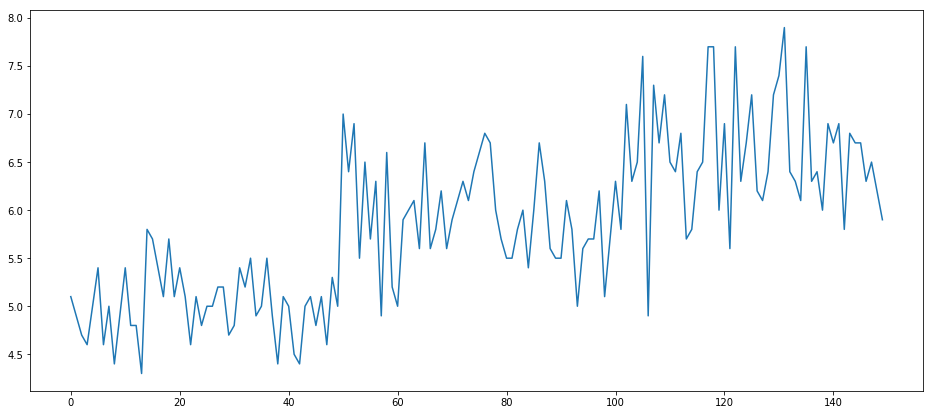

In [17]:
plt.figure(figsize=(16,7))
plt.plot(x_total, y_total)

Aqui podéis ver el resultado final de como tiene que quedar el gráfico.

Text(0,0.5,'Longitud del sépalo (cm)')

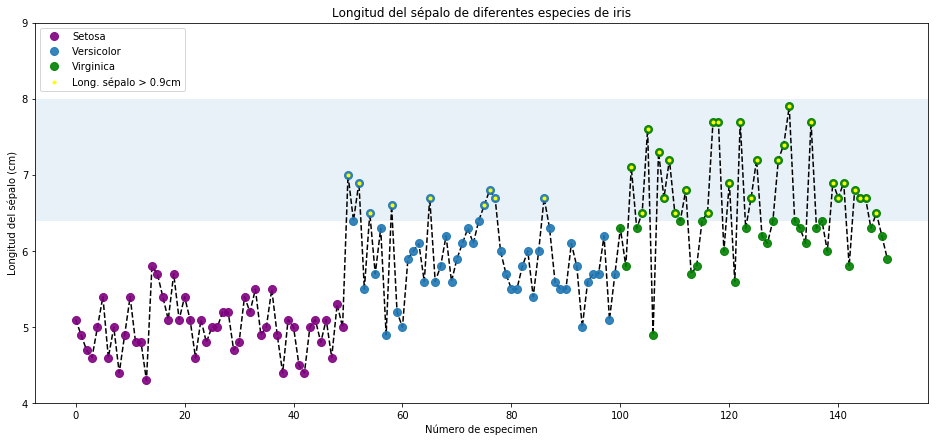

In [18]:
# %load ../../solutions/05_01_plot.py
plt.figure(figsize=(16,7))
plt.plot(x_total,y_total, color = 'black', label = '', linestyle="dashed", marker="")  # Dibujamos la evolución de f(x), frente a x

plt.plot(set_ix, setosa, label = 'Setosa', linestyle="", marker="o", markersize=8, alpha=0.9, color="purple")
plt.plot(versicolor_ix, versicolor, label = 'Versicolor', linestyle="", marker="o", markersize=8, alpha=0.9)
plt.plot(virginica_ix, virginica, label = 'Virginica', linestyle="", marker="o", markersize=8, alpha=0.9, color="green")


plt.plot(x_total[y_total > 6.4], y_total[y_total > 6.4],
         'bo', label = 'Long. sépalo > 0.9cm', markersize=3, color="yellow")  # Destacamos los valores por encima de 0.9 colocándoles un marcador circular azul

plt.axhspan(6.4, 8, alpha = 0.1)  # Colocamos una banda de color para los valores f(x) > 0.9
plt.ylim(4,9)  # Limitamos el eje x
plt.legend(loc="upper left")  # Colocamos la leyenda
plt.title(u'Longitud del sépalo de diferentes especies de iris')  # Colocamos el título del gráfico
plt.xlabel('Número de especimen')  # Colocamos la etiqueta en el eje x
plt.ylabel('Longitud del sépalo (cm)')  # Colocamos la etiqueta en el eje y

### [3.2](#Index) Lineas verticales con plt.stem

Otro tipo de gráfico sería el que podemos obtener con `plt.stem()`. Dibuja líneas verticales desde una línea base. Imaginaros, por ejemplo, que tenéis una serie temporal, la normalizamos (restándole su media y dividiendo por su desviación estándar) de forma que nos queda una serie de media 0 y desviación estándar 1. Esta nueva serie la podemos representar con `plt.stem()` donde la línea horizontal sería el valor medio (en este caso la media sería 0, recuerda que la hemos normalizado la serie) y las líneas verticales sería lo que se desvía el valor individual respecto de la media de la serie. Vamos a ver un ejemplo con los valores por encima de la media en verde y los valores por debajo de la media en rojo.

Text(0,0.5,'valores f(x)')

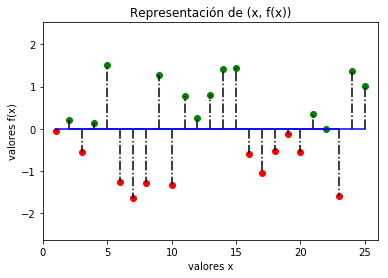

In [19]:
x = np.arange(25) + 1  # Valores de x
y = np.random.rand(25) * 10.  # Valores de y
y_norm = (y - y.mean()) / y.std()  # Valores de y normalizados. Esta nueva serie tiene media 0 y desvicación estándar 1 (comprobadlo como ejercicio)
plt.xlim(np.min(x) - 1, np.max(x) + 1)  # Colocamos los límites del eje x
plt.ylim(np.min(y_norm)-1, np.max(y_norm)+1)  # Colocamos los límites del eje y
plt.stem(x[y_norm > 0],y_norm[y_norm > 0], linefmt='k-.', markerfmt='go', basefmt='b-')  # Dibujamos los valores por encima de la media
plt.stem(x[y_norm < 0],y_norm[y_norm < 0], linefmt='k-.', markerfmt='ro', basefmt='b-')  # Dibujamos los valores por debajo de la media
plt.title(u'Representación de (x, f(x))')  # Colocamos el título del gráfico
plt.xlabel('valores x')  # Colocamos la etiqueta en el eje x
plt.ylabel('valores f(x)')  # Colocamos la etiqueta en el eje y

### [3.3](#Index) Rellenando areas entre puntos y curvas

En algunos casos, nos interesa ver cuando una serie está por encima o por debajo de la otra. Eso, con un gráfico tipo `plt.plot()` lo podemos hacer sin problemas, pero nos gustaría resaltarlo visualmente de forma sencilla. Para ello podemos usar `plt.fill_between()`. Imaginemos un ejemplo donde tenemos dos series temporales y queremos localizar fácilmente cuando la primera está por encima de la segunda y cuando está por debajo.

Text(0,0.5,'valores y')

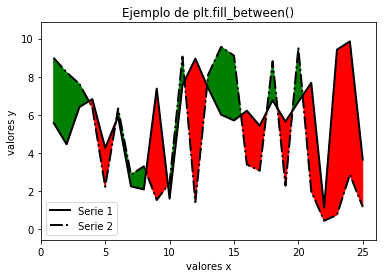

In [20]:
x = np.arange(25) + 1  # Valores de x
y1 = np.random.rand(25) * 10.  # Valores de y1
y2 = np.random.rand(25) * 10.  # Valores de y2
plt.xlim(np.min(x) - 1, np.max(x) + 1)  # Colocamos los límites del eje x
plt.ylim(np.min([y1, y2])-1, np.max([y1, y2])+1)  # Colocamos los límites del eje y
plt.plot(x, y1, 'k-', linewidth = 2, label = 'Serie 1')  # Dibujamos los valores de (x,y1) con una línea contínua
plt.plot(x, y2, 'k-.', linewidth = 2, label = 'Serie 2')  # Dibujamos los valores de (x,y2) con una línea de punto y raya
plt.fill_between(x, y1, y2, where = (y1 < y2), color = 'g', interpolate = True)  # Pinta polígonos color verde entre las líneas cuando y1 < y2 
plt.fill_between(x, y1, y2, where = (y1 > y2), color = 'r', interpolate = True)  # Pinta polígonos color rojo entre las líneas cuando y1 > y2
plt.legend()
plt.title('Ejemplo de plt.fill_between()')  # Colocamos el título del gráfico
plt.xlabel('valores x')  # Colocamos la etiqueta en el eje x
plt.ylabel('valores y')  # Colocamos la etiqueta en el eje y

Recordad que usamos valores aleatorios para y1 e y2 por lo que si usáis ese código no os tiene porque dar lo mismo. Como veis, cuando los valores de y2 son mayores que los de y1 dibuja polígonos verdes, en caso contrario dibuja polígonos rojos. Algo parecido pero para el eje y en lugar de para el eje x lo podemos hacer usando `plt.fill_betweenx()`.

### [3.4](#Index) Diagramas de caja

Y ya, lo último que vamos a ver hoy es un diagrama de caja-bigote (*box plot* o *box-whisker diagram*). Este es un diagrama donde se puede ver un resumen de una serie de forma rápida y sencilla. En él se representa el primer cuartil y el tercer cuartil, que son los extremos de la caja, el valor de la mediana (o segundo cuartil), que se representa mediante una línea dentro de la caja, y los extremos de la serie que no se consideran anómalos, los llamados 'bigotes', que son los valores extremos que están dentro del rango de 1.5 veces el rango intercuartílico (IQR por sus siglas en inglés, *Inter Quartil Range*). Los valores que quedan fuera de este rango que definamos, que como hemos comentado suele ser 1.5xIQR, se consideran valores anómalos u 'outliers' y se representan como puntos fuera de los bigotes. Por tanto, imaginemos que estamos representando la altura de las mujeres que viven en España, las mujeres que viven en Alemania y las mujeres que viven en Tailandia. Con un diagrama de caja-bigote podemos ver rápidamente como se distribuyen cada uno de estos conjuntos de datos y podemos compararlos visualmente entre ellos.

Text(0,0.5,'Altura (cm)')

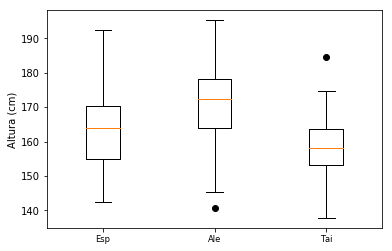

In [51]:
alt_esp = np.random.randn(100)+165 + np.random.randn(100) * 10  # Creamos unos valores para la altura de 100 españolas
alt_ale = np.random.randn(100)+172 + np.random.randn(100) * 12  # Creamos unos valores para la altura de 100 alemanas
alt_tai = np.random.randn(100)+159 + np.random.randn(100) * 9   # Creamos unos valores para la altura de 100 tailandesas
plt.boxplot([alt_esp, alt_ale, alt_tai], sym = 'ko', whis = 1.5)  # El valor por defecto para los bigotes es 1.5*IQR pero lo escribimos explícitamente
plt.xticks([1,2,3], ['Esp', 'Ale', 'Tai'], size = 'small', color = 'k')  # Colocamos las etiquetas para cada distribución
plt.ylabel(u'Altura (cm)')

## Ejercicio: Boxplot de las longitudes de sépalo

Vamos a realizar un diagrama de cajas para representar la distribucion de las longitudes de sépalo para cada tipo de iris. Usa el mismo formato que en el diagrama de cajas para la altura.

Text(0.5,1,'Longitudes de pétalo de diferentes especies')

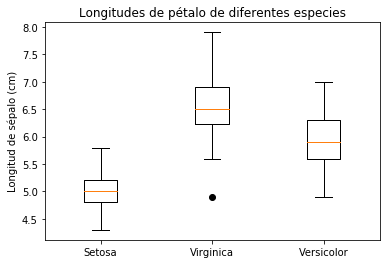

In [63]:
# %load ../../solutions/05_02_boxplot.py
plt.boxplot([setosa, virginica, versicolor], sym = 'ko', whis = 1.5)  # El valor por defecto para los bigotes es 1.5*IQR pero lo escribimos explícitamente
plt.xticks([1,2,3], ['Setosa', 'Virginica', 'Versicolor'], size = 'medium', color = 'k')  # Colocamos las etiquetas para cada distribución
plt.ylabel(u'Longitud de sépalo (cm)')
plt.title("Longitudes de pétalo de diferentes especies")

Vemos como las alemanas presentan alturas superiores y las tailandesas son las que, en general, mostrarían alturas inferiores. En las alemanas hay algunas mujeres que quedan por encima de lo que hemos considerado como valores normales llegando a alturas por encima de los 200 cm. Las españolas se encontrarían entre unas alturas de unos 140 cm y unos 190 cm.

## [4.](#Index) Gráficos de barras

Hasta ahora hemos visto como configurar las ventanas, manejo de las mismas, definir áreas de gráfico, algunos tipos de gráficos… Ahora vamos a continuar viendo tipos de gráficos disponibles desde `matplotlib.pyplot`. En este caso nos vamos a centrar en los gráficos de barras.

### [4.1](#Index) Diagrama de barras

Si en lugar de dibujar histogramas queremos dibujar gráficos de barras para representar, que se yo, la evolución de la prima de riesgo en los últimos días podemos usar `plt.bar`.

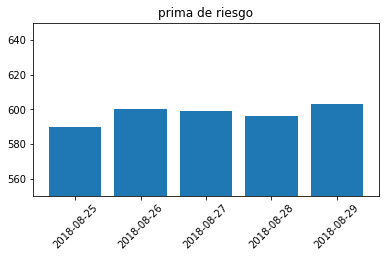

In [22]:
import datetime as dt  # Importamos el módulo datetime
prima = 600 + np.random.randn(5) * 10  # Valores inventados para la prima de riesgo
fechas = (dt.date.today() - dt.timedelta(5)) + dt.timedelta(1) * np.arange(5) # generamos las fechas de los últimos cinco días
plt.axes((0.1, 0.3, 0.8, 0.6))  # Definimos la posición de los ejes
plt.bar(np.arange(5), prima)  # Dibujamos el gráfico de barras
plt.ylim(550,650)  # Limitamos los valores del eje y al range definido [450, 550]
plt.title('prima de riesgo')  # Colocamos el título
_ = plt.xticks(np.arange(5), fechas, rotation = 45)  # Colocamos las etiquetas del eje x, en este caso, las fechas

### [4.2](#Index) Histogramas

Para dibujar un [histograma](http://es.wikipedia.org/wiki/Histograma) podemos hacer uso de `plt.hist`. Un histograma suele ser un gráfico de barras donde se representa la ocurrencia de datos (frecuencia) en intervalos definidos. Lo que hace `plt.hist` es dibujar el histograma de un vector en función del número de intervalos (*bins*) que definamos. Como siempre, vamos a ver esto con un ejemplo de código a continuación. El resultado sería el siguiente, donde se representa el cálculo que haría la función [`np.histogram`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) gráficamente y en un solo paso:

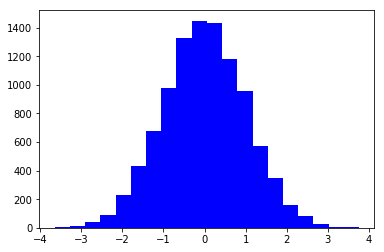

In [23]:
x = np.random.randn(10000)  # Definimos un vector de números aleatorios de una distribución normal
_ = plt.hist(x, bins = 20, rwidth=0.9, histtype="stepfilled", linewidth=1, color="blue")  # Dibuja un histograma dividiendo el vector x en 20 intervalos del mismo ancho

In [24]:
plt.hist?

Podéis jugar también con [`np.histogram2d`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html#numpy.histogram2d), [`np.histogramdd`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogramdd.html#numpy.histogramdd) y [`np.bincount`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.bincount.html#numpy.bincount)

### Ejercicio: Histograma de longitudes de pétalo

Crea un gráfico que contenga dos histogramas representando las longitudes de pétalo de las iris setosa y las iris virginica con los colores por defecto.

In [38]:
plt.figure(figsize=(10,5))


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [ ]:
# %load ../../solutions/05_03_histograma.py
plt.figure(figsize=(10,5))

plt.hist(setosa, label = 'Setosa', rwidth=0.8, bins=10,  alpha=0.8, density=False, histtype='barstacked')
plt.hist(virginica, label = 'Virginica', rwidth=0.8, bins=11, alpha=0.8, density=False, histtype='barstacked')

plt.legend(loc="upper right")  # Colocamos la leyenda
plt.title(u'Longitud del pétalo de diferentes especies de iris')  # Colocamos el título del gráfico
plt.xlabel('Longitud del pétalo (cm)')  # Colocamos la etiqueta en el eje x
_ = plt.ylabel('Número de especimenes')  # Colocamos la etiqueta en el eje y

### [4.3](#Index) Gráficos de escaleras

(0, 11)

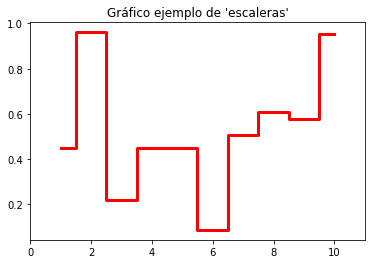

In [26]:
x = np.arange(10) + 1
y = np.random.rand(10)
plt.step(x, y, where = 'mid', color = 'r', linewidth = 3)
plt.title(u"Gráfico ejemplo de \'escaleras\'")
plt.xlim(0,11)

## [5.](#Index) Gráficos 2D

Matplotlib también ofrece la posibilidad de representar diferentes tipos de gráficos en los que comparar dos dimensiones diferentes de nuestros datos.

### [5.1](#Index) Scatter Plots

El scatter plot es el tipo de gráfico más usado para comparar dos series de datos. `plt.scatter` representa los puntos de intersección entre los valores de `x` e `y` seleccionados.

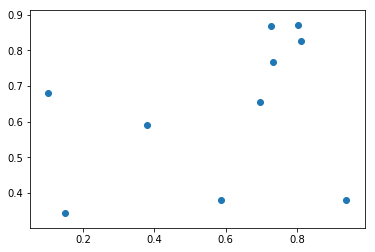

In [27]:
x = np.random.rand(10)
y = np.random.rand(10)

_ = plt.scatter(x, y)

Además de comparar dos serires de datos, también es posible asignar colores a cada uno de los puntos de la serie, ya sea para resaltar alguna de las propiedades de nuestros datos, o para representar una tercera dimensión mediante el color de cada punto. Para ello utilizaremos el parámetro `c` (de color).

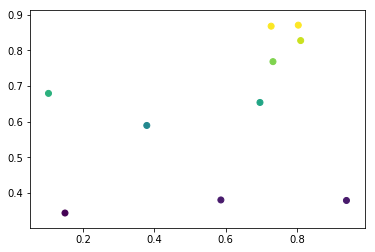

In [28]:
_ = plt.scatter(x, y, c=y)

También es posible definir por separado el tamaño de cada uno de los puntos en caso de querer resaltar alguna otra propiedad de los datos. Para ello utilizaremos el parámetro `s` (de *size*). Si este valor es un array, asignara un valor de tamaño diferente a cada punto de la serie, mientras que si es un `float` o un `int` eleccionaremos el mismo tamaño en todos los puntos.

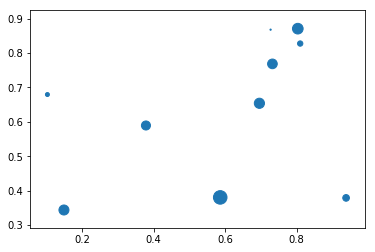

In [29]:
s = np.random.rand(10)*200

_ = plt.scatter(x, y, s=s)

Otro de las propiedades visuales de los puntos del scatterplot es el parñametro `alpha`, que controla la transparencia de los puntos del gráfico. Esta propiedad es útil cuando existe superposicion entre diferentes puntos, ya que ayuda a discriminar areas del gráfico con mucha densidad de puntos respecto de las menos densas.

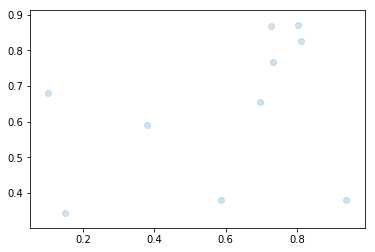

In [30]:
_ = plt.scatter(x, y, alpha=0.2)

### Ejercicio: Scatter plot de longitudes de pétalo y sépalo

Representa en un único scatter plot los tres tipos diferentes de iris y compara sus propiedades. Para ello mapea los parámtros del gráfico de la siguiente manera:
- **Eje x**: longitud de pétalo
- **Eje y**: longitud de sépalo
- **Tamaño del punto**: Ancho de pétalo * 75
- **Color**: Especie
- **Alpha**: 0.7

In [45]:
color_dict = {"setosa": "blue",
             "virginica": "green",
             "versicolor": "orange"
            }
species = df["species"].map(lambda x: color_dict[x]).values


In [46]:
plt.figure(figsize=(14, 6))

<Figure size 1008x432 with 0 Axes>

<Figure size 1008x432 with 0 Axes>

In [ ]:
# %load ../../solutions/05_04_scatter.py
plt.figure(figsize=(14, 6))
plt.scatter(pl_all, sl_all, c=species, s=pw_all * 75, alpha=0.7)
plt.grid()
plt.title(u'Longitud del pétalo vs. longitud del sépalo')  # Colocamos el título del gráfico
plt.xlabel('Longitud del pétalo (cm)')  # Colocamos la etiqueta en el eje x
plt.ylabel('Longitud del sépalo (cm)')  # Colocamos la etiqueta en el eje y

### [5.2](#Index) Gráficos de contorno

Como ya hemos comentado anteriormente, ejemplos de gráficos de contornos ya hemos visto varios. Esos gráficos de contornos se hacen a partir de datos de mallas regulares. Pero, ¿qué sucede si tenemos datos que están repartidos de forma irregular? En este caso podemos hacer uso de `plt.tricontour` y de `plt.tricontourf`. Existen unas pocas diferencias de uso con respecto a `plt.contour` y `plt.contourf`. En este caso, el valor de Z no tiene que ser 2D. Para ver su funcionamiento pensemos en un caso real. Imaginad que tenéis una red de medidas (por ejemplo, temperaturas) repartidas geográficamente en una zona (AVISO, como siempre, los datos que vamos a representar no tienen ningún sentido físico ni pretender representar una situación real y solo se usan para ver el funcionamiento de `tricontour` y `tricontourf`, en este caso). Se ha usado `plt.scatter` para representar la posición de las estaciones de medida:

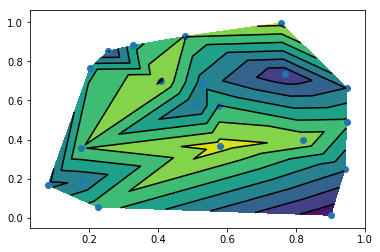

In [33]:
x = np.random.rand(20)  # posiciones X de nuestra red de medidas
y = np.random.rand(20)  # posiciones Y de nuestra red de medidas
t = np.random.rand(20)*3000  # valores de Temperatura (ºK) en las posiciones (X, Y)
plt.tricontourf(x, y, t)  # Pintamos las triangulaciones con contornos de color
plt.tricontour(x, y, t, colors = 'k')  # Pintamos las líneas de contorno en color negro
plt.scatter(x, y)  # Pintamos la posición de las estaciones de medida.

### Ejercicio: Gráfico de contorno

En este ejercicio vamos a crear un mapa de contorno representando diferentes propiedades del dataset.
- **Eje x**: ancho del pétalo
- **Eje y**: ancho del sépalo
- **Color de los puntos**: red
- **Alpha**: 0.5

In [ ]:
# %load ../../solutions/05_05_contour.py
plt.figure(figsize=(14, 6))
plt.tricontourf(sw_all, pw_all, pl_all)  # Pintamos las triangulaciones con contornos de color
plt.tricontour(sw_all, pw_all, pl_all, colors = 'k')  # Pintamos las líneas de contorno en color negro
plt.scatter(sw_all, pw_all, c="r", alpha=0.5)  # Pintamos la posición de las estaciones de medida.
plt.title(u'Mapa de contorno de longitud del pétalo')  # Colocamos el título del gráfico
plt.xlabel('Anchura del sépalo (cm)')  # Colocamos la etiqueta en el eje x
plt.ylabel('Anchura del pétalo (cm)')  # Colocamos la etiqueta en el eje y

Por defecto usa una [triangulación de Delaunay](http://es.wikipedia.org/wiki/Triangulaci%C3%B3n_de_Delaunay) pero se puede definir la triangulación que queramos haciendo uso de `matplotlib.tri.triangulation`.

Todo esto está metido dentro del paquete `matplotlib.tri`, donde también podréis encontrar `tripcolor` y  `triplot`. Probad con todo ello y mandadnos ejemplos para saber como lo usáis y aprender.

También podemos dibujar cuadros de valores que correspondan a una matriz en lugar de interpolar los valores mediante contornos. Puede suceder que, en muchos casos, el número de datos que tengamos en una malla regular sea bajo y una interpolación (usando `contour`, por ejemplo) dé resultados que pueden quedar feos y no representan fielmente lo que queremos representar. En esos casos podemos usar `plt.matshow`, que lo que hace es dibujar una matriz con cuadros de colores en función del valor de cada uno de los elementos de la matriz. Vamos a hacer otro ejemplo para que se entienda mejor. El resultado lo podemos ver en el siguiente ejemplo. En la imagen de la izquierda vemos que las líneas de contorno, en este caso, quedan mal en los bordes y la representación solo usando `matshow` (imagen de la derecha) sería más adecuada (repito, todos los ejemplos no tienen más sentido que el de explicar el uso de `matplotlib.pyplot`).

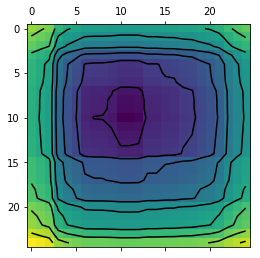

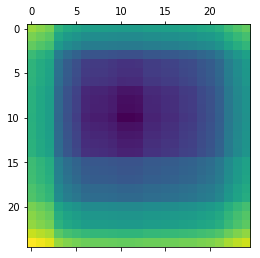

In [35]:
x = np.sort(np.random.randn(25))  # Valores de x que vamos a usar posteriormente para crear la matriz
y = np.sort(np.random.randn(25))  # Valores de y que vamos a usar posteriormente para crear la matriz
mat1, mat2 = np.meshgrid(x, y)  # Creamos dos matrices cuadradas que vamos a cruzar
mat = np.sqrt( mat1**2 + mat2 **2)  # Creamos una matriz final a partir de las dos anteriores
plt.matshow(mat)  # Representamos la última matriz con matshow
plt.contour(np.arange(25), np.arange(25), mat, 10, colors = 'k')  # Colocamos líneas de contorno para la matriz mat
plt.matshow(mat)  # Representamos la última matriz con matshow

Podéis echarle un ojo a `plt.pcolor`, `plt.pcolomesh` y `plt.tripcolor` que permiten hacer cosas similares a estas.

### [5.3](#Index) Hexbin

`plt.hexbin` hace algo parecido a lo anterior pero teniendo en cuenta la ocurrencia en los intervalos que determinemos (esto mismo lo podemos hacer, por ejemplo, con `plt.matshow` aunque tendremos que calcular previamente las frecuencias para cada recuadro). Vamos a representar el número de veces que los valores de dos series (x e y) se encuentran en determinado intervalo de datos. Para ello vamos a recurrir, como siempre, a `np.random.randn`:

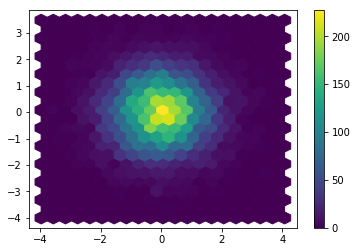

In [36]:
x = np.random.randn(10000)  # Creamos un vector de 10000 elementos distribuidos de forma normal
y = np.random.randn(10000)  # Creamos un vector de 10000 elementos distribuidos de forma normal
plt.hexbin(x,y, gridsize = 20)  # Representamos como están distribuidos bidimensionalmente con ayuda de hexbin, en este caso definimos un tamaño del grid de 20 (esto se puede elegir como se prefiera)
plt.colorbar()  # Colocamos una barra de colores para saber a qué valor corresponden los colores

Los colores los hemos colocado de forma aleatoria solo definiendo ocho colores.